<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-07-2020.csv')
                 

In [15]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
Province/State    131 non-null object
Country/Region    225 non-null object
Last Update       225 non-null object
Confirmed         225 non-null int64
Deaths            225 non-null int64
Recovered         225 non-null int64
Latitude          225 non-null float64
Longitude         225 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 14.2+ KB


In [16]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,470.382222,15.813333,259.373333,32.291328,-6.107813
std,4561.202949,197.961037,2904.298851,19.721733,90.338700
min,0.000000,0.000000,0.000000,-41.454500,-157.858400
25%,1.000000,0.000000,0.000000,27.990400,-86.175200
50%,4.000000,0.000000,0.000000,36.974100,4.000000
75%,45.000000,0.000000,2.000000,42.695300,84.250000
max,67666.000000,2959.000000,43500.000000,64.963100,174.886000


In [17]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  102


In [18]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'South Korea', 'Italy', 'Iran', 'France', 'Germany', 'Others', 'Spain', 'Japan', 'Switzerland', 'UK', 'Netherlands', 'Belgium', 'Sweden', 'Norway', 'Singapore', 'Hong Kong', 'Malaysia', 'Bahrain', 'Austria', 'US', 'Kuwait', 'Iraq', 'Iceland', 'Thailand', 'Greece', 'Taiwan', 'United Arab Emirates', 'India', 'Australia', 'Canada', 'Denmark', 'San Marino', 'Lebanon', 'Palestine', 'Israel', 'Portugal', 'Czech Republic', 'Ireland', 'Vietnam', 'Algeria', 'Oman', 'Egypt', 'Finland', 'Brazil', 'Ecuador', 'Russia', 'Croatia', 'Estonia', 'Macau', 'Azerbaijan', 'Romania', 'Argentina', 'Qatar', 'Slovenia', 'Belarus', 'Mexico', 'Pakistan', 'Philippines', 'French Guiana', 'New Zealand', 'Poland', 'Saudi Arabia', 'Chile', 'Georgia', 'Hungary', 'Indonesia', 'Senegal', 'Bosnia and Herzegovina', 'Malta', 'North Macedonia', 'Saint Barthelemy', 'Dominican Republic', 'Luxembourg', 'Martinique', 'Morocco', 'Afghanistan', 'Andorra', 'Armenia', 'Bhutan', 'Cambodia', 'Cameroon', 'Colombia', 'Costa Ri

In [19]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]


dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


,Confirmed,Deaths
Country/Region,,
China,80652,3070
Italy,5883,233
Iran,5823,145
South Korea,7041,44
US,417,17
France,949,11
Spain,500,10
Others,696,6
Japan,461,6


In [20]:
dfglobal = pd.read_csv("today.csv")
dfglobal['Death_Percent'] = round((dfglobal['Deaths'] / dfglobal['Confirmed']) *100,2)
dfglobal = dfglobal.sort_values(by = ['Death_Percent'], ascending = False)
dfglobal.head(10)


,Country/Region,Confirmed,Deaths,Death_Percent
16,Philippines,6,1,16.67
9,Iraq,54,4,7.41
17,San Marino,23,1,4.35
4,US,417,17,4.08
1,Italy,5883,233,3.96
0,China,80652,3070,3.81
11,Australia,63,2,3.17
2,Iran,5823,145,2.49
18,Taiwan,45,1,2.22
6,Spain,500,10,2.00


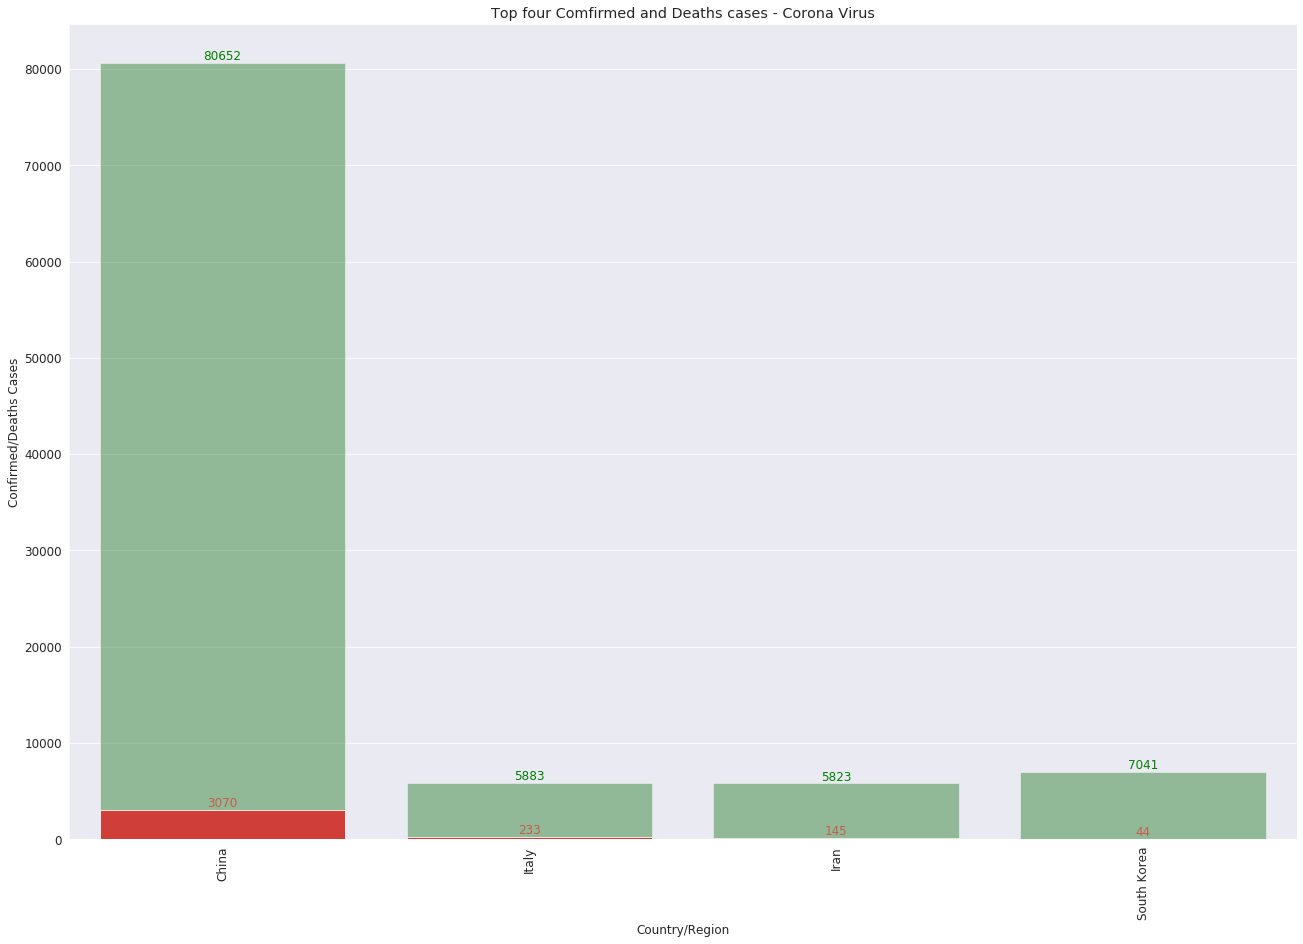

In [21]:
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(22,15))
plt.rcParams['font.family'] = "Arial Bold"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  skiprows = range(5,200))

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Top four Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()


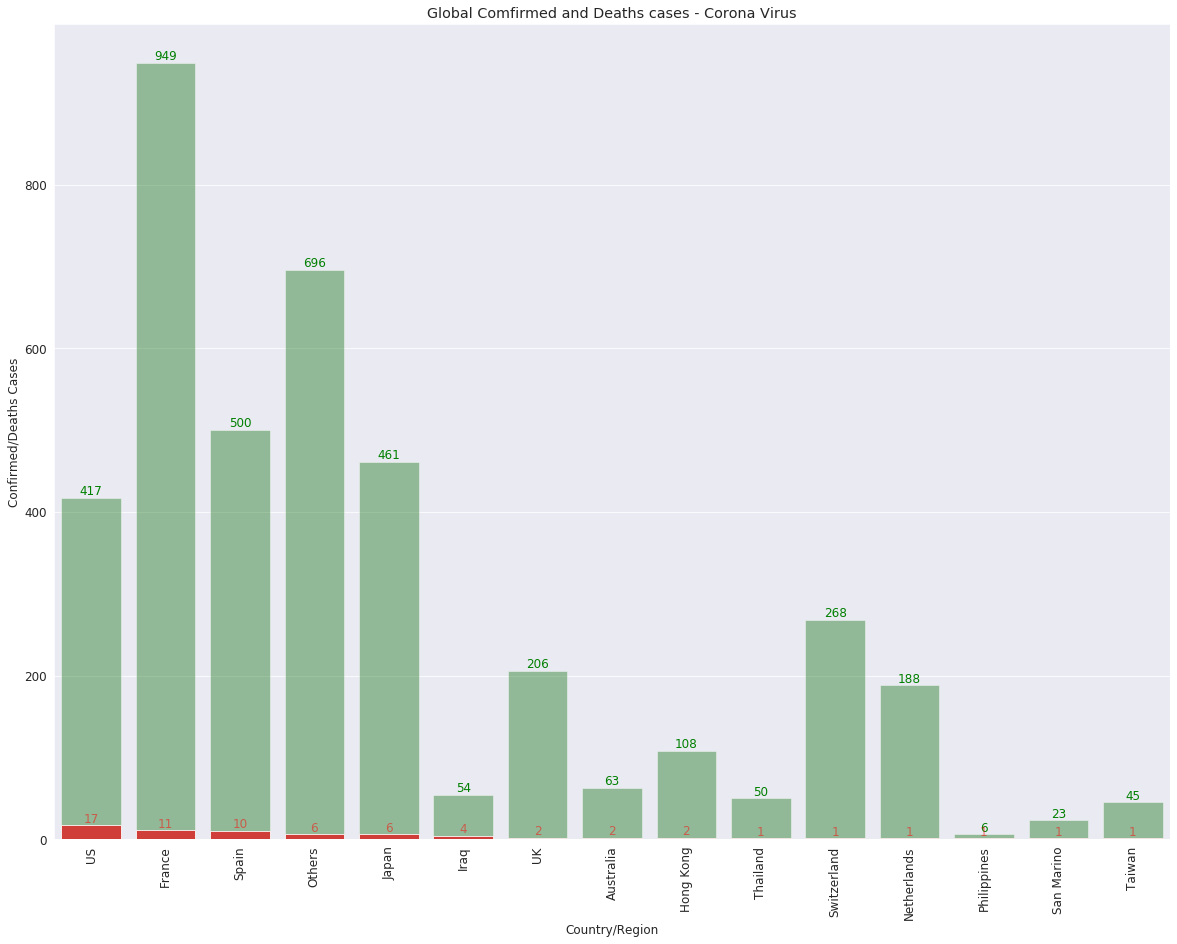

In [22]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,5)
nbr_rows_to_read = 15
#plt.rcParams['figure.figsize'] = (22.0, 15.0)
plt.figure(figsize=(20,15))
plt.rcParams['font.family'] = "Arial Bold"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths', color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')
    
    
plt.title('Global Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()

